# Bigmart regression

import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import data

In [2]:
bigmart = pd.read_csv('bigmart.csv')
print(bigmart.shape)
bigmart.head()

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Check missing data

In [3]:
bigmart.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Unique values

In [4]:
bigmart.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7667
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Filter categorical variables

In [5]:
#Filter categorical variables
categorical_columns = [x for x in bigmart.dtypes.index if bigmart.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (bigmart[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

Correct 'Item Fat Count' parameter

In [6]:
#Modify categories of Item_Fat_Content

#Change categories of fat content:
print ('Original Categories:')
print (bigmart['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
bigmart['Item_Fat_Content'] = bigmart['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (bigmart['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Data cleaning and feature engineering

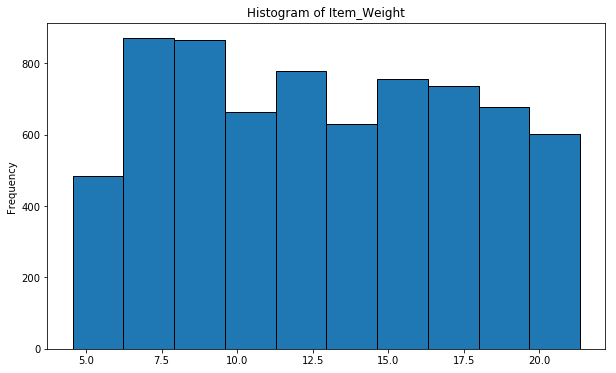

In [7]:
#Distribution of Item_Weight

%matplotlib inline 


## plot before imputing
bigmart.Item_Weight.plot(kind='hist', edgecolor='black', figsize=(10,6), title='Histogram of Item_Weight')

In [8]:
#Determine the average weight per item:
item_avg_weight = bigmart.groupby('Item_Identifier').Item_Weight.mean()

#Get a boolean variable specifying missing Item_Weight values
miss_bool = bigmart['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('Orignal #missing: %d'% sum(miss_bool))

## replace na values with the average of the item_weight for that particular product
bigmart.Item_Weight.fillna(0, inplace = True)
for index, row in bigmart.iterrows():
    if(row.Item_Weight == 0):
        bigmart.loc[index, 'Item_Weight'] = item_avg_weight[row.Item_Identifier]
        #print(item_avg_weight[row.Item_Identifier])

print ('Final #missing: %d'% sum(bigmart['Item_Weight'].isnull()))

Orignal #missing: 1463
Final #missing: 4


In [9]:
print(bigmart[bigmart['Item_Weight'].isnull()]['Item_Identifier'])

print(bigmart['Item_Identifier'].value_counts())
# 4 items with 'Item_Weight' missing only appear once so we will drop them

927     FDN52
1922    FDK57
4187    FDE52
5022    FDQ60
Name: Item_Identifier, dtype: object
FDW13    10
FDG33    10
DRN47     9
FDD38     9
FDV60     9
FDU12     9
FDX04     9
FDX20     9
FDP25     9
FDQ40     9
NCI54     9
FDG09     9
FDT07     9
NCJ30     9
FDF52     9
FDW26     9
FDV38     9
NCL31     9
FDF56     9
NCY18     9
FDW49     9
FDX31     9
FDO19     9
NCQ06     9
DRE49     9
NCB18     9
NCF42     9
NCK05     8
FDG38     8
FDY56     8
         ..
FDB10     2
FDU43     2
DRC24     2
FDP15     2
NCV18     2
DRE01     2
NCW30     2
FDA48     2
FDM38     2
DRL59     2
FDR57     2
FDD48     2
FDD22     2
NCW05     2
FDE38     2
FDH22     2
FDE39     2
NCS41     2
FDI36     2
NCG19     2
NCM42     2
FDQ60     1
FDO33     1
FDC23     1
FDY43     1
FDN52     1
FDT35     1
DRF48     1
FDK57     1
FDE52     1
Name: Item_Identifier, dtype: int64


In [10]:
# drop 4 items without 'Item_Weight' value that only appear once

bigmart = bigmart.drop(bigmart[(bigmart['Item_Identifier'] == 'FDN52') | (bigmart['Item_Identifier'] == 'FDK57') | (bigmart['Item_Identifier'] == 'FDE52') | (bigmart['Item_Identifier'] == 'FDQ60')].index)

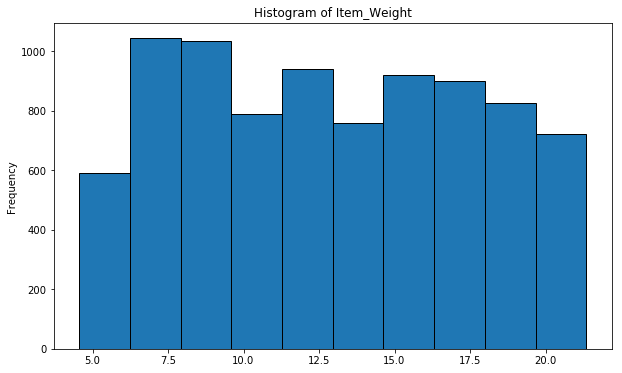

In [11]:
## plot after imputing
bigmart.Item_Weight.plot(kind='hist', edgecolor='black', figsize=(10,6), title='Histogram of Item_Weight')



In [12]:
bigmart.groupby(['Outlet_Identifier', 'Outlet_Type']).Outlet_Size.value_counts(dropna=False)

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT010             Grocery Store      NaN            555
OUT013             Supermarket Type1  High           932
OUT017             Supermarket Type1  NaN            926
OUT018             Supermarket Type2  Medium         928
OUT019             Grocery Store      Small          527
OUT027             Supermarket Type3  Medium         932
OUT035             Supermarket Type1  Small          930
OUT045             Supermarket Type1  NaN            929
OUT046             Supermarket Type1  Small          930
OUT049             Supermarket Type1  Medium         930
Name: Outlet_Size, dtype: int64

In [13]:
bigmart.groupby('Outlet_Type').Outlet_Size.value_counts(dropna=False)

Outlet_Type        Outlet_Size
Grocery Store      NaN             555
                   Small           527
Supermarket Type1  Small          1860
                   NaN            1855
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          932
Name: Outlet_Size, dtype: int64

In [14]:
# OUT010, OUT017 and OUT045 are small:

bigmart.loc[bigmart.Outlet_Identifier.isin(['OUT010','OUT017','OUT045']), 'Outlet_Size'] = 'Small'

Feature engineering

In [15]:
bigmart.min()

Item_Identifier                      DRA12
Item_Weight                          4.555
Item_Fat_Content                   Low Fat
Item_Visibility                          0
Item_Type                     Baking Goods
Item_MRP                             31.29
Outlet_Identifier                   OUT010
Outlet_Establishment_Year             1985
Outlet_Size                           High
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                    33.29
dtype: object

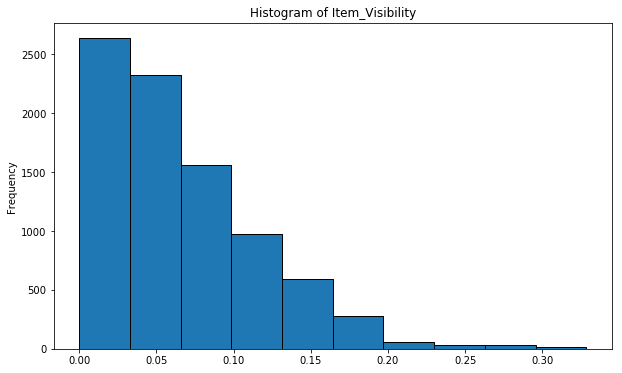

In [16]:
bigmart.Item_Visibility.plot(kind='hist', edgecolor='black', figsize=(10,6), title='Histogram of Item_Visibility')

In [17]:
# Replace '0' with group mean because a visibility of '0' doesn't make sense

bigmart.loc[bigmart.Item_Visibility == 0, 'Item_Visibility'] = np.nan

IV_mean = bigmart.groupby('Item_Identifier').Item_Visibility.mean()

bigmart.Item_Visibility.fillna(0, inplace=True)
#replace 0 with group mean

for index, row in bigmart.iterrows():
    if(row.Item_Visibility == 0):
        bigmart.loc[index, 'Item_Visibility'] = IV_mean[row.Item_Identifier]
        
bigmart.Item_Visibility.describe()

count    8519.000000
mean        0.070732
std         0.050301
min         0.003575
25%         0.031395
50%         0.058093
75%         0.098819
max         0.328391
Name: Item_Visibility, dtype: float64

In [18]:
# Add years of operation of a store

bigmart['Outlet_Years'] = 2018 - bigmart['Outlet_Establishment_Year']
bigmart.Outlet_Years.describe()

count    8519.000000
mean       20.162108
std         8.369105
min         9.000000
25%        14.000000
50%        19.000000
75%        31.000000
max        33.000000
Name: Outlet_Years, dtype: float64

In [19]:
# Create a broad category of Type of item

bigmart['Item_Type_Combined'] = bigmart['Item_Identifier'].apply(lambda x: x[0:2])

bigmart['Item_Type_Combined'] = bigmart['Item_Type_Combined'].map({'FD':'Food',
                                                                  'DR': 'Drinks',
                                                                  'NC': 'Non-Consumable'})

bigmart['Item_Type_Combined'].value_counts()

Food              6121
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [20]:
# Impute 'Non-Edible' when 'Item_fat_Content' is Non-Edible

bigmart.loc[bigmart['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
bigmart['Item_Fat_Content'].value_counts()

Low Fat       3917
Regular       3003
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [21]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
bigmart['Outlet'] = le.fit_transform(bigmart['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    bigmart[i] = le.fit_transform(bigmart[i])

In [22]:
#One Hot encoding
bigmart = pd.get_dummies(bigmart, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined', 'Outlet_Identifier', 'Outlet' ])

In [23]:
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Identifier_OUT010       uint8
Outlet_Identifier_OUT013       uint8
Outlet_Identifier_OUT017       uint8
O

In [24]:
bigmart.drop(['Item_Type', 'Outlet_Establishment_Year', 'Item_Identifier'], axis=1, inplace=True)

In [25]:
bigmart.apply(lambda x: sum(x.isnull()))

Item_Weight                 0
Item_Visibility             0
Item_MRP                    0
Item_Outlet_Sales           0
Outlet_Years                0
Item_Fat_Content_0          0
Item_Fat_Content_1          0
Item_Fat_Content_2          0
Outlet_Location_Type_0      0
Outlet_Location_Type_1      0
Outlet_Location_Type_2      0
Outlet_Size_0               0
Outlet_Size_1               0
Outlet_Size_2               0
Outlet_Type_0               0
Outlet_Type_1               0
Outlet_Type_2               0
Outlet_Type_3               0
Item_Type_Combined_0        0
Item_Type_Combined_1        0
Item_Type_Combined_2        0
Outlet_Identifier_OUT010    0
Outlet_Identifier_OUT013    0
Outlet_Identifier_OUT017    0
Outlet_Identifier_OUT018    0
Outlet_Identifier_OUT019    0
Outlet_Identifier_OUT027    0
Outlet_Identifier_OUT035    0
Outlet_Identifier_OUT045    0
Outlet_Identifier_OUT046    0
Outlet_Identifier_OUT049    0
Outlet_0                    0
Outlet_1                    0
Outlet_2  

In [26]:
y = bigmart['Item_Outlet_Sales']
X = bigmart.drop('Item_Outlet_Sales', axis=1)
print(y.shape)
print(X.shape)

(8519,)
(8519, 40)


# Models

In [27]:
# modules
from sklearn.model_selection import train_test_split

In [31]:
# Linear regression

from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y)
Lr = LinearRegression()

Lr.fit(X_train, y_train)
print('train accuracy is %f' % Lr.score(X_train, y_train))
print('test accuracy is %f' % Lr.score(X_test, y_test))

train accuracy is 0.563372
test accuracy is 0.561681


In [35]:
# Linear regression

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y)
ridge = Ridge(alpha=0.1)

ridge.fit(X_train, y_train)
print('train accuracy is %f' % ridge.score(X_train, y_train))
print('test accuracy is %f' % ridge.score(X_test, y_test))

train accuracy is 0.564044
test accuracy is 0.559851
